Задача 1
Используя данные о хоккеистах (скачать можно здесь), проверьте, является ли среди
хоккеистов из Финляндии, Норвегии и Дании значимым отличие: а) роста, б) BMI.



Похоже мой датасэт отличается от того из задания.

In [13]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def anova(*ys: np.ndarray) -> float:
    """Функция возвращает значение F-статистики
    для дисперсионного анализа.
    """

    y = np.concatenate(ys)

    ss_b = sum((yi.mean() - y.mean()) ** 2 * yi.size for yi in ys)
    ss_w = sum(((yi - yi.mean()) ** 2).sum() for yi in ys)

    sigma_b = ss_b / (len(ys) - 1)
    sigma_w = ss_w / (y.size - len(ys))

    return sigma_b / sigma_w

In [6]:
df = pd.read_csv('hockey_players.csv')
df.head(2)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277


In [7]:
countries = ['FIN', 'NOR', 'DEN']

In [8]:
ys = [df.loc[df['country'] == country, 'height'] for country in countries]

F = anova(*ys)
F

4.273207343917213

Для построения критической области нам нужны квантили распределения Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$, где $k$ — число уровней, $n$ — общее число элементов во всех выборках.

In [10]:
k = len(countries)
n = sum(y.size for y in ys)

k1 = k - 1
k2 = n - k

k1, k2

(2, 1023)

In [12]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.0045220661840073

In [14]:
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

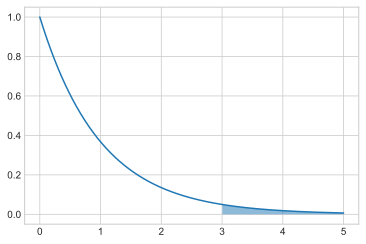

In [16]:
ox = np.linspace(0, 5, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 5, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)

plt.fill_between(ox_right, oy_right, alpha=0.5)


Поскольку статистика попала в критическую область, заключаем, что между ростами хоккеистов выбранных стран действительно есть значимое отличие.

In [17]:
ys = [df.loc[df['country'] == country, 'bmi'] for country in countries]

F = anova(*ys)
F

36.058167277438194

Разница между BMI хоккеистов также признаётся значимой.